**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 3 LDA(Linear Discriminant Analysis)

**LDA**

LDA는 선형 판별 분석법으로 불리며 PCA와 매우 유사하다.

다만 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.

- PCA는 입력 데이터의 변동성이 가장 큰 축을 찾는다. 


- LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾는다.

LDA는 클래스 분리를 최대화 하는 축을 찾기 위해 클래스 간 분산은 최대화하고 클래스 내 분산은 최소화한다.

PCA가 공분산 행렬을 사용한 반면 LDA는 클래스 간 분산, 클래스 내 분산 행렬을 사용하는 것이 가장 큰 차이점이다.

**LDA 수행과정**

1. 클래스 내부와 클래스 간 분산 행렬을 계산한다. 
    
    두 행렬은 입력 데이터의 결정값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.


2. 클래스 내부 분산 행렬을 $S_{W}$, 클래스 간 분산을 $S_{B}$라 하면 다음과 같이 표현 가능하다.

$$
S_{W}S_{B} =
\begin{bmatrix}
e_{1} & \cdots & e_{n}
\end{bmatrix}
\begin{bmatrix}
\lambda_{1}  & \cdots & 0 \\
\vdots & \cdots & \cdots \\
0 & \cdots &  \lambda_{n} \\
\end{bmatrix}
\begin{bmatrix}
{e_{1}}^{t} \\
\vdots \\
{e_{n}}^{t} \\
\end{bmatrix}
$$


3. 고유값이 가장 큰 순으로 K개(LDA의 변환 차수)만큼 고유벡터를 추출한다.


4. 고유값이 가장 큰 순으로 추출된 고유베터를 이용해 새롭게 입력 데이터를 변환한다.

## 3.1 IRIS 데이터

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()

# 피처 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)

- 선행 작업으로 IRIS 데이터의 피처를 스케일링 하였다.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 변환할 차원 수 입력
lda = LinearDiscriminantAnalysis(n_components=2)

# 학습
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

print(f"스케일 데이터 shape: {iris_scaled.shape}")
print(f"LDA 데이터 shape: {iris_lda.shape}")

스케일 데이터 shape: (150, 4)
LDA 데이터 shape: (150, 2)


- LDA를 이용해 기존 4차원(4개 피처)에서 2차원으로 변환 하였다.


- 비지도학습인 PCA와는 다르게 LDA는 지도학습으로서 클래스의 결정 값 즉, target이 꼭 필요하다.

In [5]:
# LDA 데이터 프레임 생성
lda_columns=['lda_component_1','lda_component_2']

iris_df_lda = pd.DataFrame(iris_lda, columns = lda_columns)
iris_df_lda['target'] = iris.target

iris_df_lda.head(3)

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0


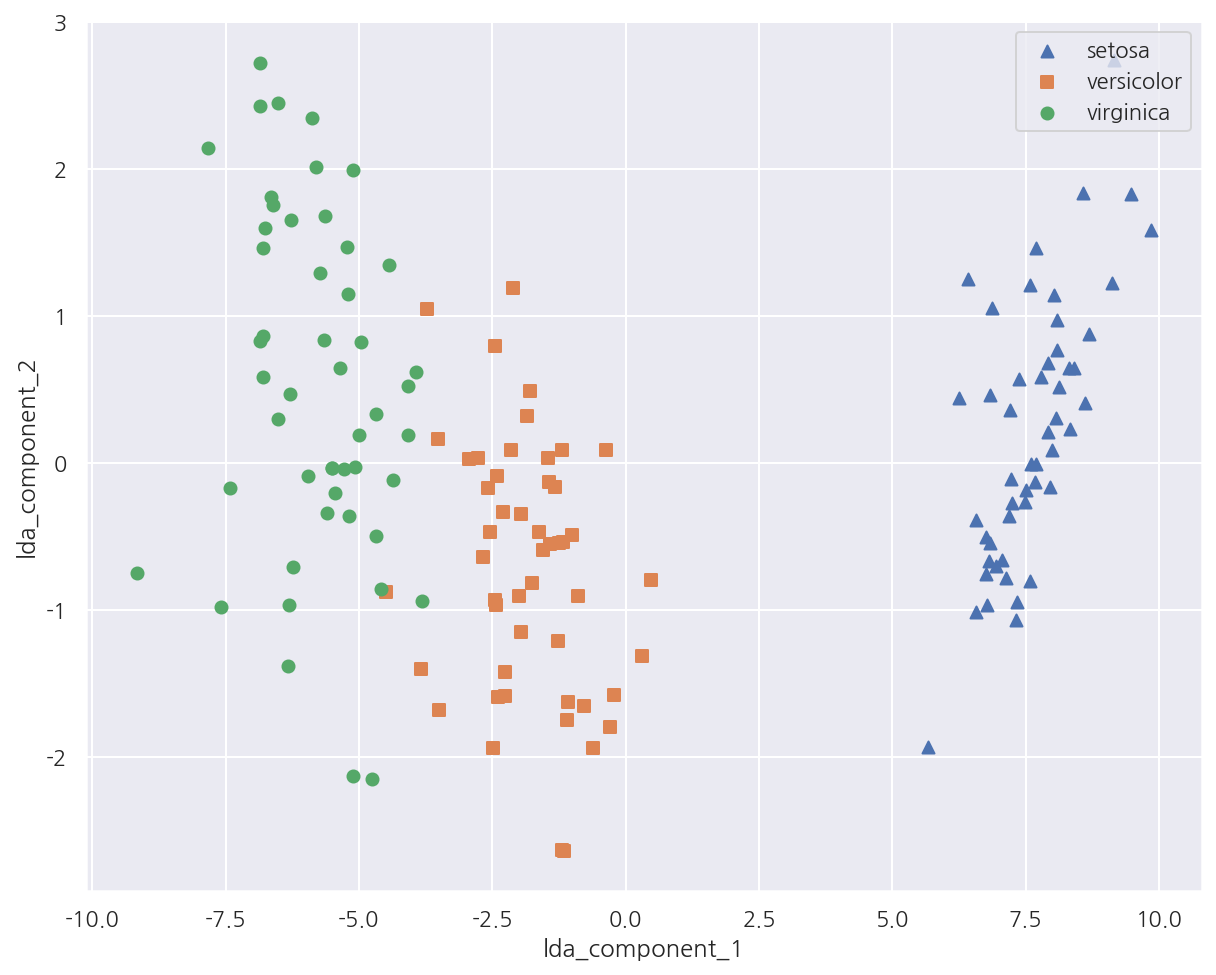

In [6]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_component_1']
    y_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc="upper right")
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

- LDA 변환 후 2개의 속성(피처)로 붓꽃 종류를 시각화 하였다.


- 모든 붓꽃 종류가 lda_component_1 축을 기반으로 비교적 잘 구분되었다.